**Exercice 1 — Régression : Prédiction du tarif d’un trajet Uber**
Jeu de données : Uber Fare Prediction Dataset (Kaggle).
Lien : https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
Objectif : prédire le prix d’un trajet Uber à partir de caractéristiques comme la distance, l’heure, le jour
de la semaine, etc.

**Étape 1 : Chargement et exploration du jeu de données**

In [60]:
import pandas as pd

data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [64]:
# nombre de valeurs manquantes
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

**Étape 2 : Nettoyage et préparation**

In [67]:
# y a deux valeurs manquantes dans tous le tableau, on peut tous simplement les supprimer
data = data.dropna()

# Retirer les valeurs aberrantes, un tarif négatif ou nul n’a aucun sens dans la réalité
data = data[data['fare_amount'] > 0]

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,2


In [68]:
# nous disposons aussi des paires de coordonnées géographiques pour le ramassage et le dépôt, que nous devons transformer a une distance 
# ceci en aplliquant la formule d'Haversine :

import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Convertir degrees au radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # formule d'Haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Rayon de la Terre en kilomètres
    R = 6371
    distance = R * c
    return distance

data['distance'] = data.apply(lambda row: haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude), axis=1)
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,4.475450


**Étape 3 : Séparation des données**

In [70]:
from sklearn.model_selection import train_test_split
X = data[['distance', 'hour', 'day_of_week']]
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Étape 4 : Entraînement du modèle**

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
# prediction
y_pred = lr.predict(X_test)

**Étape 5 : Évaluation du modèle**

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('MAE =', mae)
print('RMSE =', rmse)
print('R² =', r2)

# mauvaises resultats

MAE = 6.024606980536918
RMSE = 9.635978518193681
R² = 0.0014590917488974675


**Étape 6 : Amélioration avec Random Forest**

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print('MAE =', mae_rf)
print('RMSE =', rmse_rf)
print('R² =', r2_rf)

MAE = 2.6756318445326897
RMSE = 5.24469986210002
R² = 0.7041881991849209


**Étape 7 : Visualisation des résultats**

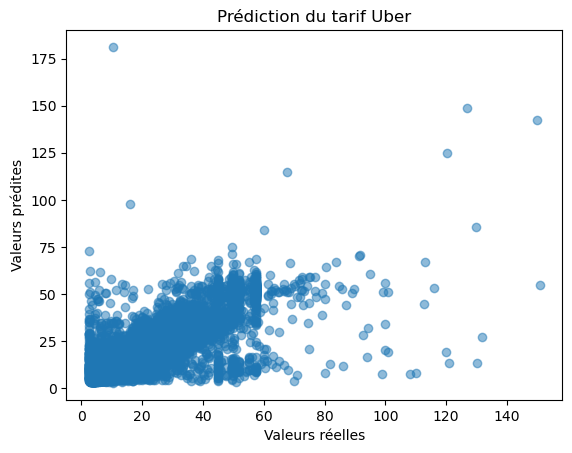

In [124]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédiction du tarif Uber')
plt.show()

**Exercice 2 — Classification : Prédire la survie sur le Titanic**
Jeu de données : Titanic - Machine Learning from Disaster (Kaggle).
Lien : https://www.kaggle.com/competitions/titanic
Objectif : prédire si un passager a survécu (1) ou non (0) non au naufrage

**Étape 1 : Chargement et exploration**

In [141]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
print(data.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [145]:
print(data.isnull().sum())
# les colonnes Age, Cabin et Embarked contiennent des valeurs manquantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Étape 2 : Nettoyage et traitement**

In [148]:
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

# Comme plus de la moitié des valeurs de Cabin sont absentes, il est préférable de supprimer entièrement cette colonne.
# pour Age et Embarked, on peut les remplacer par des valeurs calculées (la médiane pour Age et la valeur la plus fréquente pour Embarked
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

**Étape 3 : Encodage des variables catégorielles**

In [151]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

**Étape 4 : Séparation des données**

In [154]:
X = data.drop('Survived', axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Étape 5 : Entraînement des modèles**

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Étape 6 : Évaluation des modèles**

In [165]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print('Accuracy (Logistic):', accuracy_score(y_test, y_pred_log))
print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# accuracy_score(y_true, y_pred) : Mesure le taux de bonnes prédictions ( # nmb pred corr / # nmb total ech )

# classification_report(y_true, y_pred) : Fournit un résumé complet pour chaque classe (ici 0 = n’a pas survécu, 1 = a survécu) :
    # precision : proportion de prédictions positives correctes. p = TP / (TP +FP)
    # recall (rappel / sensibilité) : proportion des vrais positifs détectés.  r = TP / (TP + FN)
    # f1-score : moyenne harmonique de la précision et du rappel. F1 = 2*(p*r)/(p+r)
    # support : nombre d’échantillons réels pour chaque classe dans le test.
    # macro avg : moyenne simple de chaque métrique sur toutes les classes (sans tenir compte de la taille de chaque classe).
    # weighted avg : moyenne pondérée par le nombre d’échantillons de chaque classe.

Accuracy (Logistic): 0.8100558659217877
Accuracy (Random Forest): 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [167]:
# Accuracy (Logistic): 0.810 --> Le modèle linéaire a correctement prédit 81% des passagers.
# Accuracy (Random Forest): 0.821 --> Random Forest est légèrement meilleur que la regression logistique ( 82% de bonnes prédictions )

# Pour les non-survivants (0) :
    # précision = 0.83 --> 83% des prédictions “non survécu” étaient correctes
    # recall = 0.88 --> 88% des vrais non-survivants ont été détectés
    # modèle plus fiable pour la classe majoritaire (0)

# Pour les survivants (1) :
    # précision = 0.81 --> 81% des prédictions “survécu” correctes
    # recall = 0.74 --> seulement 74% des survivants réels ont été détectés
    # le modèle sous-estime légèrement les survivants

# --> le modèle est plus précis pour prédire les non-survivants que les survivants.

**Étape 7 : Matrice de confusion**

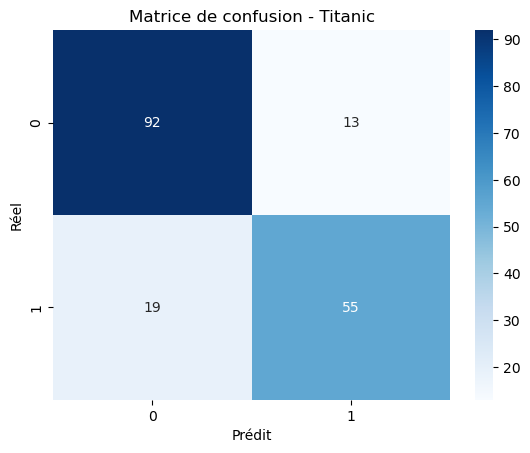

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # visualiser la performance du modèle de classification
    # annot=True affiche les nombres dans chaque case.
    # fmt='d' indique un format entier.
plt.title('Matrice de confusion - Titanic')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [ ]:
# La matrice contient :
    # cm[0,0] : vrais négatifs (VN) → nombre de passagers prédits non survivants et réellement non survivants.
    # cm[0,1] : faux positifs (FP) → nombre de passagers prédits survivants mais réellement non survivants.
    # cm[1,0] : faux négatifs (FN) → nombre de passagers prédits non survivants mais réellement survivants.
    # cm[1,1] : vrais positifs (VP) → nombre de passagers prédits survivants et réellement survivants.


# analyse des resultats :
# le modèle a correctement prédit 92 passagers comme non survivants.
# 13 passagers ont été prédits survivants alors qu’ils n’ont pas survécu.
# 19 passagers ont été prédits non survivants alors qu’ils ont survécu.
# le modèle a correctement prédit 55 passagers comme survivants.

# --> le modèle fonctionne bien, mais il a plus de difficultés à prédire correctement les survivants (19 FN) que les non-survivants (13 FP).